In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


## PRA PROSES

In [22]:
# Memuat dataset dari file
file_path = 'dataset.csv'
dataset = pd.read_csv(file_path)
dataset['Y'] = dataset['Y'].astype(int)
# Menampilkan dataset asli
print(dataset.head(10))


   Participant       EAR       MAR       MOE  Y
0          1.0  0.352255  0.998264  2.833928  0
1          1.0  0.324341  0.993003  3.061603  0
2          1.0  0.367728  0.999941  2.719243  0
3          1.0  0.326678  1.000042  3.061252  0
4          1.0  0.204691  0.975033  4.763446  0
5          1.0  0.322249  0.990653  3.074186  0
6          1.0  0.348220  0.998665  2.867914  0
7          1.0  0.284540  0.988960  3.475651  0
8          1.0  0.296542  1.000722  3.374638  0
9          1.0  0.351582  1.013374  2.882331  0


In [23]:
# Normalisasi dataset (kecuali kolom 'Y')
dataset['Y'] = dataset['Y'].astype(int)
scaler = MinMaxScaler()
print("\n Dataset sebelum dilakukan normalisasi (kolom 'EAR','MAR','MOE'):")
print(dataset.head()[['EAR','MAR','MOE']])
normalized_data = scaler.fit_transform(dataset[['EAR', 'MAR','MOE']])

normalized_df = pd.DataFrame(normalized_data, columns=['EAR', 'MAR','MOE'])

# Menggabungkan kembali data yang dinormalisasi dengan kolom 'Y'
normalized_df['Y'] = dataset['Y']

# Menampilkan dataset setelah menambahkan kembali kolom 'Y'
print("\nDataset setelah normalisasi (kolom 'EAR', 'MAR', MOE):")
print(normalized_df.head())



 Dataset sebelum dilakukan normalisasi (kolom 'EAR','MAR','MOE'):
        EAR       MAR       MOE
0  0.352255  0.998264  2.833928
1  0.324341  0.993003  3.061603
2  0.367728  0.999941  2.719243
3  0.326678  1.000042  3.061252
4  0.204691  0.975033  4.763446

Dataset setelah normalisasi (kolom 'EAR', 'MAR', MOE):
        EAR       MAR       MOE  Y
0  0.834402  0.332282  0.064733  0
1  0.768281  0.313073  0.082701  0
2  0.871054  0.338405  0.055682  0
3  0.773816  0.338774  0.082673  0
4  0.484860  0.247457  0.217007  0


In [24]:
# Membuat urutan data untuk input LSTM dengan panjang urutan 5 (mewakili 5 detik)
SEQ_LENGTH = 5

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length, :-1]
        y = data[i+seq_length, -1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(normalized_df.values, SEQ_LENGTH)

# Menampilkan beberapa contoh urutan data (sequences)
# print("\nContoh urutan data (X):")
print(X[:5])
# print("\nContoh label (y):")
# print(y[:5])


[[[0.83440159 0.3322821  0.06473324]
  [0.76828146 0.31307263 0.08270088]
  [0.87105368 0.3384051  0.05568247]
  [0.7738162  0.33877442 0.08267318]
  [0.48486038 0.24745747 0.21700723]]

 [[0.76828146 0.31307263 0.08270088]
  [0.87105368 0.3384051  0.05568247]
  [0.7738162  0.33877442 0.08267318]
  [0.48486038 0.24745747 0.21700723]
  [0.76332608 0.30449235 0.08369393]]

 [[0.87105368 0.3384051  0.05568247]
  [0.7738162  0.33877442 0.08267318]
  [0.48486038 0.24745747 0.21700723]
  [0.76332608 0.30449235 0.08369393]
  [0.82484445 0.33374478 0.06741535]]

 [[0.7738162  0.33877442 0.08267318]
  [0.48486038 0.24745747 0.21700723]
  [0.76332608 0.30449235 0.08369393]
  [0.82484445 0.33374478 0.06741535]
  [0.67400213 0.29831118 0.11537685]]

 [[0.48486038 0.24745747 0.21700723]
  [0.76332608 0.30449235 0.08369393]
  [0.82484445 0.33374478 0.06741535]
  [0.67400213 0.29831118 0.11537685]
  [0.70243309 0.34125761 0.10740502]]]


In [25]:
# Memisahkan data menjadi set pelatihan dan pengujian
split_ratio = 0.8
split = int(split_ratio * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]



## PELATIHAN MODEL

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2]), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(LSTM(50, return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Kompilasi Model 
learning_rate = 0.000005
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 50)             10800     
                                                                 
 dropout_4 (Dropout)         (None, 5, 50)             0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31,051
Trainable params: 31,051
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Pelatihan model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
model.save('lstm_model.h5')

Epoch 1/100
252/252 [==============================] - 6s 11ms/step - loss: 1.5569 - accuracy: 0.5211 - val_loss: 1.5457 - val_accuracy: 0.9524
Epoch 2/100
252/252 [==============================] - 2s 8ms/step - loss: 1.5343 - accuracy: 0.5993 - val_loss: 1.5230 - val_accuracy: 0.9871
Epoch 3/100
252/252 [==============================] - 2s 9ms/step - loss: 1.5119 - accuracy: 0.6788 - val_loss: 1.5008 - val_accuracy: 0.9876
Epoch 4/100
252/252 [==============================] - 2s 9ms/step - loss: 1.4899 - accuracy: 0.7491 - val_loss: 1.4790 - val_accuracy: 0.9881
Epoch 5/100
252/252 [==============================] - 2s 9ms/step - loss: 1.4683 - accuracy: 0.8176 - val_loss: 1.4574 - val_accuracy: 0.9881
Epoch 6/100
252/252 [==============================] - 2s 8ms/step - loss: 1.4474 - accuracy: 0.8552 - val_loss: 1.4361 - val_accuracy: 0.9881
Epoch 7/100
252/252 [==============================] - 2s 9ms/step - loss: 1.4259 - accuracy: 0.9043 - val_loss: 1.4149 - val_accuracy: 0.988

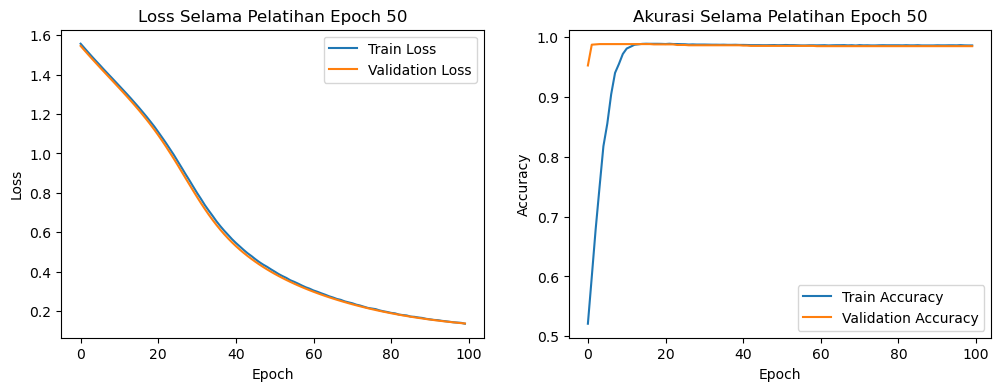

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualisasi loss dan akurasi
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Selama Pelatihan Epoch 50')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Akurasi Selama Pelatihan Epoch 50')
plt.legend()

plt.show()


In [29]:
from tensorflow.keras.models import load_model

# Memuat model dari file
model = load_model('lstm_epoch50_new.h5')

# Menampilkan ringkasan model untuk memastikan model telah dimuat dengan benar
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10800     
                                                                 
 dropout (Dropout)           (None, 5, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31,051
Trainable params: 31,051
Non-trainable params: 0
_________________________________________________________________


## EVALUASI MODEL

In [30]:
import numpy as np

# Identifikasi indeks kelas 'Sleepy' dan 'Not Sleepy' dalam y_test
sleepy_indices = np.where(y_test == 1)[0]
non_sleepy_indices = np.where(y_test == 0)[0]

# Mengambil sebagian data 'Sleepy' untuk dihapus
np.random.seed(42)  # Untuk reproducibility
sleepy_indices_to_remove = np.random.choice(sleepy_indices, size=119, replace=False)

# Menyimpan indeks yang tersisa
remaining_indices = np.setdiff1d(np.arange(len(y_test)), sleepy_indices_to_remove)

# Mengurangi jumlah data y_test dan X_test
X_test = X_test[remaining_indices]
y_test = y_test[remaining_indices].astype(int)  # Konversi ke integer

# Memastikan jumlah data setelah pengurangan
print(y_test.shape)


(2400,)


75/75 [==============================] - 2s 5ms/step - loss: 0.1342 - accuracy: 0.9850
Test Accuracy: 98.50%
315/315 [==============================] - 3s 4ms/step - loss: 0.1297 - accuracy: 0.9856
Train Accuracy: 98.56%
75/75 [==============================] - 1s 3ms/step


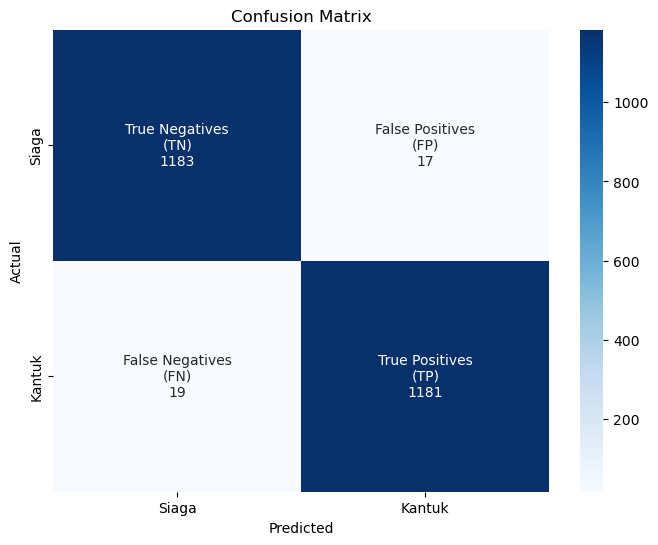

              precision    recall  f1-score   support

       Siaga       0.98      0.99      0.99      1200
      Kantuk       0.99      0.98      0.98      1200

    accuracy                           0.98      2400
   macro avg       0.99      0.98      0.98      2400
weighted avg       0.99      0.98      0.98      2400



In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the reduced test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')

# Predict on the reduced test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)


# Create labels for the confusion matrix
labels = np.array([['True Negatives\n(TN)', 'False Positives\n(FP)'],
                   ['False Negatives\n(FN)', 'True Positives\n(TP)']])

# Combine labels and values into one string for each cell
combined_labels = np.asarray([f'{label}\n{value}' for label, value in zip(labels.flatten(), cm.flatten())]).reshape(2, 2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=combined_labels, fmt='', cmap='Blues', xticklabels=['Siaga', 'Kantuk'], yticklabels=['Siaga', 'Kantuk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=['Siaga', 'Kantuk']))
